In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import random as rd

# Sklearn Packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Graphing Decision Trees
from sklearn.tree import plot_tree

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.inspection import permutation_importance

import warnings 
warnings.filterwarnings('ignore')

PREPROCESSING

In [106]:
# We split our data into response and explanatory sets.

df = pd.read_csv('conf_exoplanet_data.csv')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Exoplanet Archive Disposition,Orbital Period [days],Transit Epoch [BKJD],Impact Parameter,Transit Duration [hrs],Transit Depth [ppm],Planetary Radius [Earth radii],Equilibrium Temperature [K],Insolation Flux [Earth flux],Transit Signal-to-Noise,Stellar Effective Temperature [K],Stellar Surface Gravity [log10(cm/s**2)],Stellar Radius [Solar radii],Dec [decimal degrees],Kepler-band [mag]
0,CONFIRMED,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,48.141651,15.347
1,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,48.141651,15.347
2,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,48.285210,15.597
3,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,48.226200,15.509
4,CONFIRMED,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,48.224670,15.714


In [107]:
# astro_data is our data, and astro_res is our response variable.

astro_res = df['Exoplanet Archive Disposition']

for idx in range(len(astro_res)):
    if astro_res[idx] == 'CONFIRMED':
        astro_res[idx] = 1
    else:
        astro_res[idx] = 0

In [108]:
astro_data = df.drop(['Exoplanet Archive Disposition'], axis = 1)
astro_data.head()

,Orbital Period [days],Transit Epoch [BKJD],Impact Parameter,Transit Duration [hrs],Transit Depth [ppm],Planetary Radius [Earth radii],Equilibrium Temperature [K],Insolation Flux [Earth flux],Transit Signal-to-Noise,Stellar Effective Temperature [K],Stellar Surface Gravity [log10(cm/s**2)],Stellar Radius [Solar radii],Dec [decimal degrees],Kepler-band [mag]
0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,48.141651,15.347
1,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,48.141651,15.347
2,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,48.285210,15.597
3,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,48.226200,15.509
4,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,48.224670,15.714


In [109]:
# We split into train and test, using 60% train set size and random state 81.

astro_data_train, astro_data_test, astro_res_train, astro_res_test = train_test_split(astro_data, astro_res, train_size=0.6, random_state=8)

astro_res_train = astro_res_train.astype('int')
astro_res_test = astro_res_test.astype('int')

In [110]:
# We will run several classification models. We'd like a threshenhold that 
# maximizes TPR and minimizes FPR. To do this, we'll use cross-validation 
# with 5 folds. For our optimal hyper-parameter value, we'll print the 
# confusion matrix and compare between models.

def display_conf_mat(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print('Confusion Matrix:')
    print('TN:',str(tn),'\t',end='')
    print('FP:',str(fp))
    print('FN:',str(fn),'\t',end='')
    print('TP:',str(tp))

In [111]:
def display_metrics(y_true, y_pred):
    print('Accuracy:',str(accuracy_score(y_true,y_pred)))
    print('Precision:',str(precision_score(y_true,y_pred)))
    print('Recall:',str(recall_score(y_true,y_pred)))
    print('F1 Score:',str(f1_score(y_true,y_pred)))

In [112]:
# We find the value of K that minimizes the sum of all the metric scores.

def find_opt_hyperparam(func_metric):
    opt_param = list(func_metric.keys())[0]
    highest_metric = list(func_metric.values())[0]

    for item in func_metric:
        if func_metric[item]>highest_metric:
            highest_metric=func_metric[item]
            opt_param=item

    print("Optimized Hyperparam Value:",str(opt_param))
    print('Sum of metrics:',str(highest_metric))

DECISION TREE CLASSIFICATION

In [113]:
# Since gini is computationally easier and our data set has a decent number of samples, 
# we choose gini as our criterion. We tune so that the sum of accuracy, recall, precision, and 
# f1 is maximized. 

dtc_metric_scores = dict()

for depth in range(1,21):
    dtc = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=depth, random_state=69)
    dtc.fit(astro_data_train, astro_res_train)

    dtc_scores = cross_val_score(dtc, astro_data_train, astro_res_train, cv=5, scoring='accuracy')

    accuracy = np.mean(dtc_scores)
    
    dtc_metric_scores[depth] = accuracy


In [114]:
# With a random state= 69, our optimal value of max_depth is 5.
find_opt_hyperparam(dtc_metric_scores)

Optimized Hyperparam Value: 7
Sum of metrics: 0.8960200195843759


In [115]:
astro_dtc = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5)
astro_dtc.fit(astro_data_train, astro_res_train)

res_pred_dtc = pd.Series(astro_dtc.predict(astro_data_test))
display_metrics(list(astro_res_test),res_pred_dtc)
display_conf_mat(list(astro_res_test),res_pred_dtc)

Accuracy: 0.8796571051763931
Precision: 0.7910094637223974
Recall: 0.9093381686310064
F1 Score: 0.8460565162378744
Confusion Matrix:
TN: 1665 	FP: 265
FN: 100 	TP: 1003


In [116]:
# From our results, we observe an accuracy of 0.899 using bagging at max_depth = 6, with
# all of our metrics slightly below 0.90

# For a computationally cheap model, our decision tree is performing reasonably well. It 
# may be valuable to see if overfitting might lower the accuracy of our predictions on the
# test data. We can use a bagging algorithm to test this hypothesis. 

In [117]:
# We create a bootstrap aggregating function to further test our model.

def dtc_bagging_predictions(x_train,y_train,num_bootstraps):
    predictions = []

    for i in range(num_bootstraps):
        # Bagging indices
        indices = list(np.random.choice(np.arange(y_train.shape[0]), size=y_train.shape[0]))

        x_boot = x_train.iloc[indices]
        y_boot = y_train.iloc[indices]
        
        # DTC with same hyperparameter
        clf = astro_dtc
        clf.fit(x_boot,y_boot)
        
        # Use the trained model to predict on X_to_evaluate samples
        i_pred = clf.predict(x_train)

        # Append the predictions to the predictions list
        predictions.append(i_pred)
    
    # Using a threshold of 0.5, we take the average of all the predictions for each sample,
    # and then use that value for our final bagging predictions.

    threshold_pred = []
    for idx in range(y_train.shape[0]):
        avg_pred = 0
        for pred_set in predictions:
            avg_pred+=pred_set[idx]
        avg_pred = avg_pred / num_bootstraps

        if avg_pred >= 0.5:
            threshold_pred.append(1)
        else:
            threshold_pred.append(0)

    return threshold_pred

In [118]:
# Using our thresholded bagging predictions, we can get additional metrics about the per-
# formance of our decision tree with max_depth = 5

# Trial 1:
dtc_bagging_pred_one = dtc_bagging_predictions(astro_data_train,astro_res_train,20)
display_metrics(astro_res_train,dtc_bagging_pred_one)
display_conf_mat(astro_res_train,dtc_bagging_pred_one)

Accuracy: 0.9034952736865245
Precision: 0.8341680578742349
Recall: 0.9140243902439025
F1 Score: 0.872272330520803
Confusion Matrix:
TN: 2611 	FP: 298
FN: 141 	TP: 1499


In [119]:
# Trial 2:
dtc_bagging_pred_two = dtc_bagging_predictions(astro_data_train,astro_res_train,20)
display_metrics(astro_res_train,dtc_bagging_pred_two)
display_conf_mat(astro_res_train,dtc_bagging_pred_two)

Accuracy: 0.9063530446251924
Precision: 0.8316939890710382
Recall: 0.9280487804878049
F1 Score: 0.8772334293948126
Confusion Matrix:
TN: 2601 	FP: 308
FN: 118 	TP: 1522


In [120]:
# Trial 3:
dtc_bagging_pred_three = dtc_bagging_predictions(astro_data_train,astro_res_train,20)
display_metrics(astro_res_train,dtc_bagging_pred_three)
display_conf_mat(astro_res_train,dtc_bagging_pred_three)

Accuracy: 0.9001978456803693
Precision: 0.8265418502202643
Recall: 0.9152439024390244
F1 Score: 0.8686342592592593
Confusion Matrix:
TN: 2594 	FP: 315
FN: 139 	TP: 1501


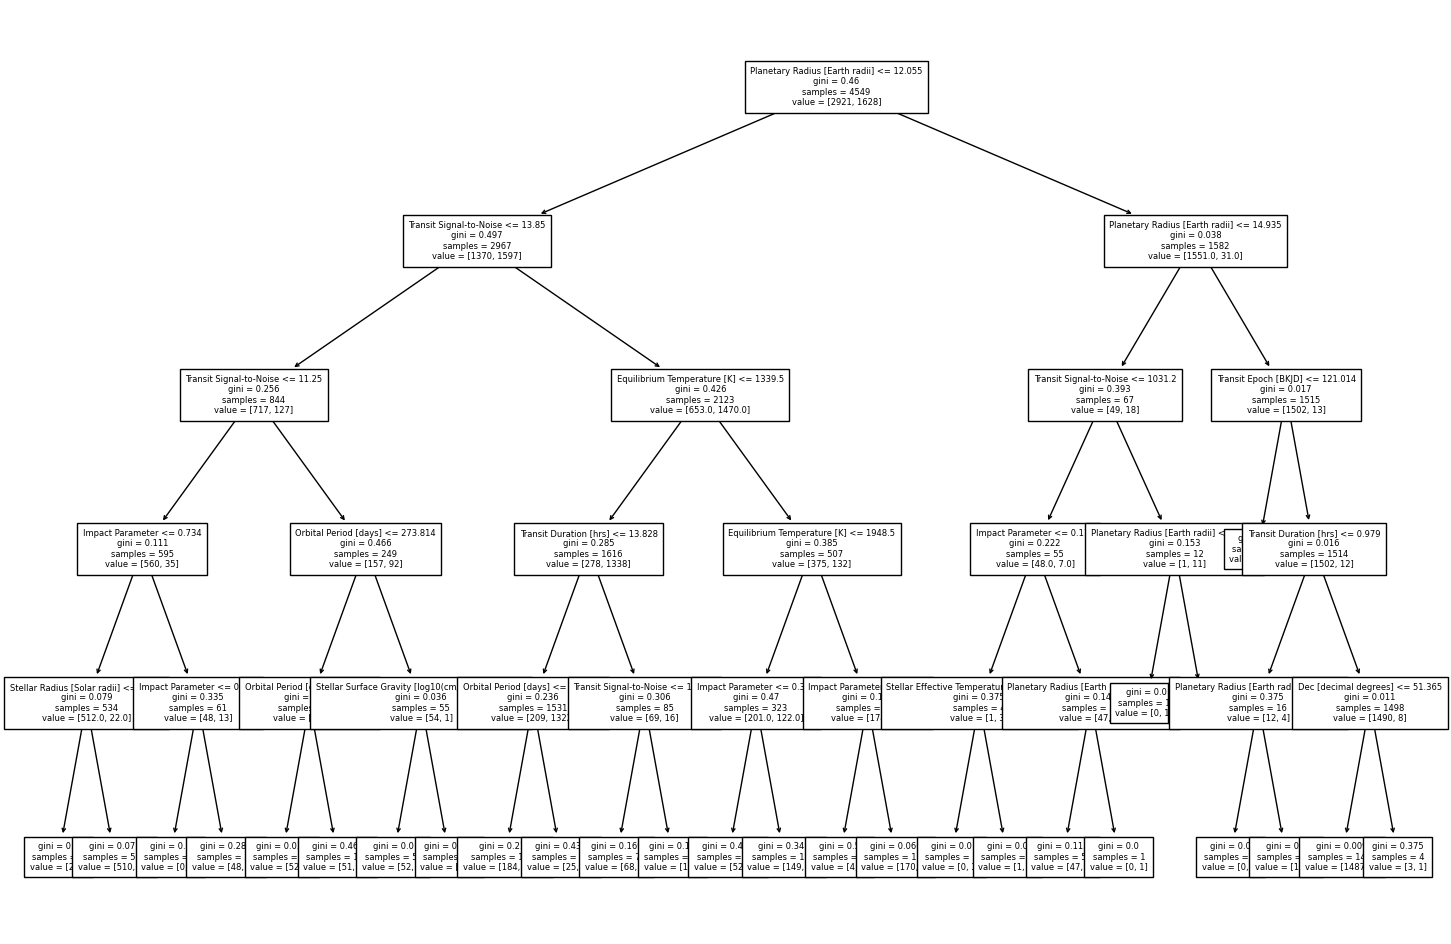

In [121]:
plt.figure(figsize=(18,12))
plot_tree(astro_dtc, feature_names=astro_data_train.columns, fontsize=6)
plt.show()

Feature Importance

In [122]:
# Visualization code

def plot_permute_importance(result,data):
    fig, ax = plt.subplots(figsize=(15, 15))

    importance_index = np.argsort(result.importances_mean)
    feature_indices = np.arange(0, len(result.importances_mean))

    ax.barh(feature_indices, result.importances_mean[importance_index], color='#FBD0C0')
    ax.set_yticks(feature_indices)
    ax.set_yticklabels(data.columns[importance_index])
    ax.set_xlabel("Permutation Feature Importance", fontsize=16)

    plt.show()

# NOTE: Code is not my own. Code is from Exercise 4.3 of HarvardX CS109xa, with modifications for utility.

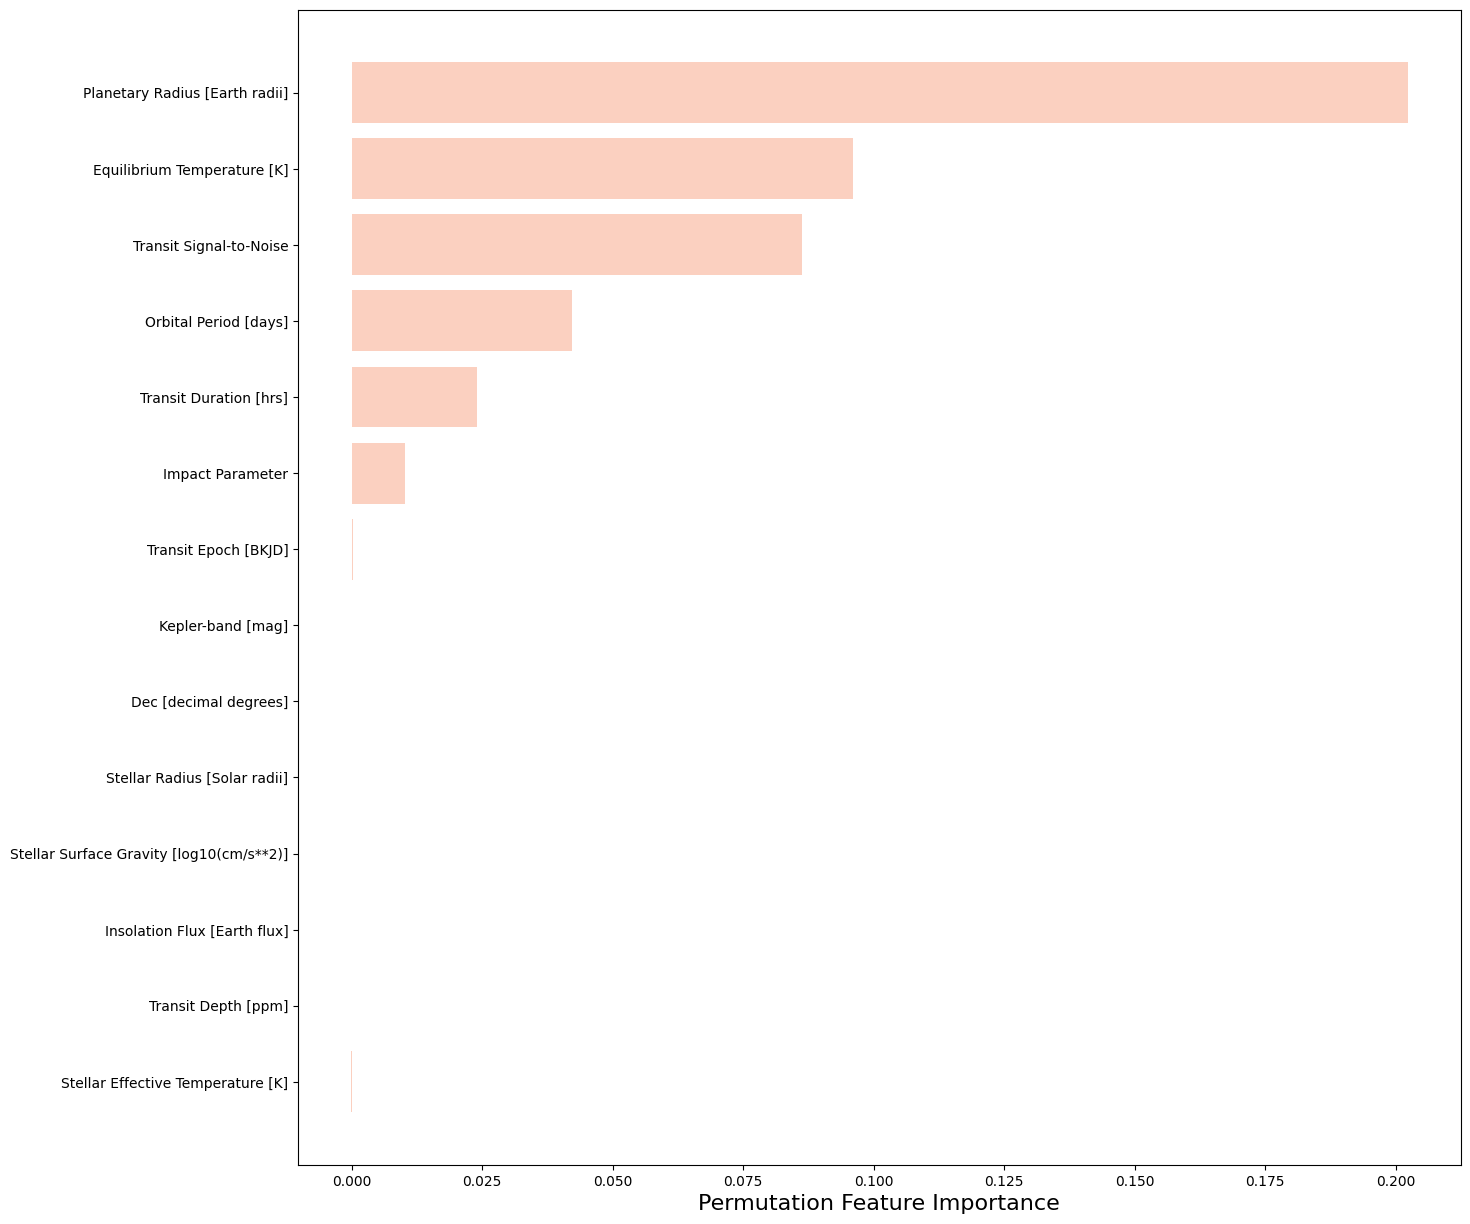

In [123]:
# What features are the most helpful for classifying exoplanets as CONFIRMED or FALSE POSITIVE cases?

astro_dtc_res = permutation_importance(astro_dtc,astro_data_train,astro_res_train,random_state=17)

plot_permute_importance(astro_dtc_res,astro_data_train)

In [124]:
# From our results, we observe an accuracy of 0.93 using bagging at max_depth = 6, with
# all of our metrics at around 0.90

# Furthermore, based on our feature importance, the crux of our data lies in Planetary Radius,
# Transit Signal-to-Noise, and Insolation Flux.

# It's clear that our decision tree performs very well when using bagging on the training
# data. Furthermore, we've already established that our decision tree model performs very
# well when predicting on the test data. We hope to see better results with more computationally
# expensive models. 

RANDOM FOREST CLASSIFICATION:

In [125]:
# We obviously see that the Decision Tree Classifier has the best accuracy.
# We choose to run a Random Forest Classification, hoping for an accuracy 
# that is above 90 percent. To tune this one correctly, we use an exhaustive
# search for the best hyperparameter using Grid Search CV.

# To make our computations less expensive, we'll first use a random search to
# find a range of optimal hyperparameters. The numbers below are based on the
# results of the randomized search taken below, which consistently generate
# accuracy of up to 0.90

parameters = {
    'n_estimators': [int(x) for x in np.linspace(10, 50, num=10)],
    'criterion': ['gini'],
    'max_depth': [int(x) for x in np.linspace(16,24,2)],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [int(x) for x in np.linspace(2,6,2)],
    'max_features': [int(x) for x in np.linspace(6,12,2)]    
}

Randomized Search: May take 5+ minutes.

rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=parameters, n_iter = 250, scoring = ('accuracy','precision', 'recall', 'f1'), n_jobs = -1, cv = 5, return_train_score = False, refit=False)
rfc_random_results = rfc_random.fit(astro_res_train,astro_res_train)

rfc_random_metric_sum = rfc_random_results.cv_results_['mean_test_accuracy'] + rfc_random_results.cv_results_['mean_test_precision'] + rfc_random_results.cv_results_['mean_test_recall'] + rfc_random_results.cv_results_['mean_test_f1']

rfc_random_max_score = max(rfc_random_metric_sum)
rfc_random_max_score_idx = np.where(rfc_random_metric_sum == rfc_random_max_score)[0][0]

random_parameters = rfc_random_results.cv_results_['params']
best_random_parameters = random_parameters[rfc_random_max_score_idx]

print(best_random_parameters)

Metrics for the best random parameters:

random_rfc = RandomForestClassifier(n_estimators=250, min_samples_split=2, min_samples_leaf=3, max_features=9, max_depth=16, criterion='gini')
random_rfc.fit(astro_data_train, astro_res_train)

res_pred_random_rfc = random_rfc.predict(astro_data_test)

display_metrics(list(astro_res_test),res_pred_random_rfc)
display_conf_mat(list(astro_res_test),res_pred_random_rfc)

====================================================================

Accuracy: 0.9146060006594131

Precision: 0.8708260105448155

Recall: 0.898458748866727

F1 Score: 0.8844265952699688

Confusion Matrix:

TN: 1783 	FP: 147

FN: 112 	TP: 991

GRID SEARCH CV:

In [126]:
# This code can take ~45 minutes to run.

forest = RandomForestClassifier()

astro_rfc = GridSearchCV(estimator=forest, param_grid=parameters, scoring = ('accuracy','precision', 'recall', 'f1'), n_jobs = -1, cv = 5, return_train_score = False, refit=False)
astro_rfc_results = astro_rfc.fit(astro_data_train, astro_res_train)

In [127]:
rfc_res = astro_rfc_results.cv_results_['mean_test_accuracy']
astro_rfc_accuracy = [x if str(x) != 'nan' else 0 for x in rfc_res]
max_accuracy = max(astro_rfc_accuracy)
max_accuracy_idx = astro_rfc_accuracy.index(max_accuracy)

gscv_parameters = astro_rfc_results.cv_results_['params']
gscv_opt_parameters = gscv_parameters[max_accuracy_idx]

print(gscv_opt_parameters)

{'criterion': 'gini', 'max_depth': 24, 'max_features': 12, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


OPTIMIZED MODEL PREDICTIONS

In [128]:
# We see very impressive results with this method. Note that the parameters used
# are from one instance of Randomized Search CV, so certain iterations of this program
# may find different hyperparameters.

astro_opt_rfc = RandomForestClassifier(criterion='gini', max_depth=16, max_features=6, min_samples_leaf=2, min_samples_split=3, n_estimators=36)
astro_opt_rfc.fit(astro_data_train, astro_res_train)

astro_pred_opt_rfc = astro_opt_rfc.predict(astro_data_test)

display_metrics(astro_res_test,astro_pred_opt_rfc)
display_conf_mat(astro_res_test,astro_pred_opt_rfc)

Accuracy: 0.9096604022420046
Precision: 0.867790594498669
Recall: 0.886672710788758
F1 Score: 0.8771300448430494
Confusion Matrix:
TN: 1781 	FP: 149
FN: 125 	TP: 978


FINAL TESTING

In [143]:
# Now that we have created a model, we can predict on our candidate data and
# tie out results back to each sample.

cand_planet_data = pd.read_csv('cand_exoplanet_data.csv')
cand_planet_data.head()

,Unnamed: 0,KepID,Exoplanet Archive Disposition,Disposition Score,Orbital Period [days],Transit Epoch [BKJD],Impact Parameter,Transit Duration [hrs],Transit Depth [ppm],Planetary Radius [Earth radii],Equilibrium Temperature [K],Insolation Flux [Earth flux],Transit Signal-to-Noise,Stellar Effective Temperature [K],Stellar Surface Gravity [log10(cm/s**2)],Stellar Radius [Solar radii],Dec [decimal degrees],Kepler-band [mag]
0,2,10811496,CANDIDATE,0.000,19.899140,175.850252,0.969,1.7822,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,48.134129,15.436
1,58,11818800,CANDIDATE,0.999,40.419504,173.564690,0.911,3.3620,6256.0,7.51,467.0,11.29,36.9,5446.0,4.507,0.781,50.080231,15.487
2,62,11918099,CANDIDATE,0.993,7.240661,137.755450,1.198,0.5580,556.4,19.45,734.0,68.63,13.7,5005.0,4.595,0.765,50.230350,15.334
3,63,9579641,CANDIDATE,0.871,3.435916,132.662400,0.624,3.1330,23.2,0.55,1272.0,617.61,8.7,5779.0,4.339,1.087,46.276241,12.791
4,84,3115833,CANDIDATE,1.000,10.181584,177.141891,0.920,3.5089,5741.1,7.73,812.0,102.91,183.6,5988.0,4.541,0.836,38.241669,15.657


In [144]:
cand_kepID = cand_planet_data['KepID'].values
cand_dispos_score = cand_planet_data['Disposition Score']
cand_rfc_data = cand_planet_data.drop(['Unnamed: 0','KepID','Exoplanet Archive Disposition','Disposition Score'],axis=1)
cand_pred = list(astro_opt_rfc.predict(cand_rfc_data))

# 1s correspond to CONFIRMED exoplanet predictions, while 0s corresopnnd to FALSE POSITIVE 
# exoplanet predictions.

for idx in range(len(cand_pred)):
    cand_pred[idx] = (lambda x : "Pred CONFIRMED" if x == 1 else "Pred FALSE POSITIVE")(cand_pred[idx])

In [145]:
# We drop any exoplanets with Disposition Score = 1.0, since such values should correspond to a confirmed exoplanet.

cand_res_df = pd.DataFrame({'KepID':cand_kepID,'Predictions':cand_pred,'Disposition Score':cand_dispos_score})
cand_res_df = cand_res_df.drop(cand_res_df[cand_res_df['Disposition Score'] == 1].index)

cand_res_df.to_csv('exoplanet_predictions.csv')

In [148]:
# Code is NOT original; taken from Stack Exchange response, https://stackoverflow.com/questions/71084687/how-to-display-large-matrix-in-pandas-with-scroll-bars-in-jupyter-notebook

from IPython.display import display, HTML

# Puts the scrollbar next to the DataFrame
display(
    HTML(
        "<div style='height: 200px; overflow: auto; width: fit-content'>" +
        cand_res_df.to_html() +
        "</div>"
    )
)

,KepID,Predictions,Disposition Score
0,10811496,Pred FALSE POSITIVE,0.000
1,11818800,Pred FALSE POSITIVE,0.999
2,11918099,Pred FALSE POSITIVE,0.993
3,9579641,Pred FALSE POSITIVE,0.871
7,4936180,Pred FALSE POSITIVE,0.000
8,5115978,Pred FALSE POSITIVE,NaN
9,6867155,Pred FALSE POSITIVE,0.998
10,6526710,Pred FALSE POSITIVE,0.994
11,6599919,Pred FALSE POSITIVE,0.000
13,7031517,Pred FALSE POSITIVE,0.000
